PROJECT DETAILS

This data cleaning projects requires data gathering, analysing and cleaning of data as eight quality issues and two tidiness issues at minimum will to be assessed and cleaned.

The tasks for this project includes:

Data wrangling, which consists of:
Gathering data
Assessing data
Cleaning data
Storing, analyzing, and visualizing our wrangled data
Reporting on 1) our data wrangling efforts and 2) our data analyses and visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import json
import tweepy
import requests
import os
import warnings
import re
import time

DATA GATHERING PHASE

This twitter Archive file will be downloaded manually since it is already provided by the instructors 


In [42]:
# read csv as a Pandas DataFrame
twitter_archive = pd.read_csv('python/data_cleaning/twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


DATA 2 - IMPORT TWEET IMAGE PREDICTIONS

The tweet image predictions reports, 'what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network'. This file (image_predictions.tsv) as instructed will be downloaded programmatically from the udacity server at https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [4]:
# I will use the requests library to download the tsv file
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('python/data_cleaning/image_predictions.tsv', 'wb') as file:
    file.write(response.content)


In [5]:
#Reading the tsv image
image_predictions = pd.read_csv('python/data_cleaning/image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Time to Query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file.

The tweet should be stored in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [7]:
#Setting up the Twitter API with authentication pieces
import tweepy

# Authenticate to Twitter
auth = tweepy.OAuthHandler("CONSUMER_KEY", "CONSUMER_SECRET")
auth.set_access_token("ACCESS_TOKEN", "ACCESS_TOKEN_SECRET")


# Create API object
api = tweepy.API(auth, wait_on_rate_limit=True,
    wait_on_rate_limit_notify=True)


Reference; twitter_api.py code below got from - https://github.com/syedsaqibimam/Wrangle-and-Analyze-data/blob/master/twitter_api.py

In [8]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
# Use Twitter API to collect status data on tweets present in twitter1 dataframe
tweet_ids = list(twitter_archive['tweet_id'])

tweet_data = []
tweet_id_success = []
tweet_id_missing = []
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
    except:
        tweet_id_missing.append(tweet_id)
        print(tweet_id)

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946


Rate limit reached. Sleeping for: 435


827228250799742977
812747805718642688
802247111496568832
779123168116150273
775096608509886464
770743923962707968


Rate limit reached. Sleeping for: 745


754011816964026368


Rate limit reached. Sleeping for: 797
Rate limit reached. Sleeping for: 801


680055455951884288


Rate limit reached. Sleeping for: 797


In [33]:
## Write tweet data to json file

with open('python/data_cleaning/tweet_json.txt', 'w', encoding='utf-8') as file:
    for tweet_id in tweet_data:
        
        json.dump(tweet_id._json, file, ensure_ascii=False)   
        file.write('\n')
    

In [453]:
# Read text file line by line to create dataframe
tweets_data = []
with open('python/data_cleaning/tweet_json.txt', 'r', encoding='utf-8') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
twitter_api = pd.DataFrame(tweets_data, columns=list(tweets_data[0].keys()))

In [454]:
#select only  the necessary columns for wrangling and visualization
twitter_df = twitter_api[['id', 'retweet_count', 'favorite_count']]


In [455]:
twitter_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,7889,36985
1,892177421306343426,5860,31830
2,891815181378084864,3867,23978
3,891689557279858688,8058,40306
4,891327558926688256,8717,38510


TIME TO MAKE COPIES OF OUR THREE DATA FRAMES FOR CLEANING 


In [743]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
twitter_api_clean = twitter_df.copy()

ACCESSING DATA

PROJECT REQUIREMENT

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. 

Key Points

KEY POINTS TO KEEP IN MIND WHEN DATA WRANGLING FOR THIS PROJECT:

You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
Cleaning includes merging individual pieces of data according to the rules of tidy data.
The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

In [744]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [745]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [746]:
twitter_archive_clean.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [747]:
twitter_archive_clean.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [748]:
twitter_archive_clean.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
Sadie          8
the            8
Bailey         7
Daisy          7
Buddy          7
an             7
Toby           7
Dave           6
Rusty          6
Leo            6
Milo           6
Stanley        6
Bella          6
Koda           6
Jax            6
Jack           6
Oscar          6
Scout          6
Louis          5
            ... 
Lipton         1
Sweet          1
Dug            1
Flurpson       1
Tater          1
Einstein       1
Staniel        1
Dietrich       1
Dunkin         1
Enchilada      1
Sandra         1
Alejandro      1
Harnold        1
Cal            1
Zuzu           1
Griswold       1
Rontu          1
Brownie        1
Millie         1
Emanuel        1
Bloo           1
Zeus           1
Barclay        1
Brian          1
Beckham        1
Traviss        1
Sage           1
Akumi         

In [749]:
twitter_archive_clean.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/833124694597443584/photo/1,https://twitter.com/dog_rates/status/833124694597443584/photo/1,https://twitter.com/dog_rates/status/833124694597443584/photo/1                                                                    2
https://www.gofundme.com/3ti3nps,https://twitter.com/dog_rates/status/868552278524837888/photo/1,https://twitter.com/dog_rates/status/868552278524837888/photo/1                                                                                                   2
https://www.gofundme.com/my-puppys-double-cataract-surgery,https://twitter.com/dog_rates/status/825026590719483904/photo/1,https://twitter.com/dog_rates/status/825026590719483904/photo/1                                                                         2
https://www.gofundme.com/3hgsuu0,https://twitter.com/dog_rates/status/840632337062862849/photo/1                                                                                                                         

In [750]:
twitter_archive_clean.expanded_urls.duplicated().sum()

137

In [751]:
twitter_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


TWITTER ARCHIVE 

QUALITY ISSUES


Retweets are contained in the data. These are unwanted data (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) and needs to be deleted.

Tweet_id are integers instead of objects (strings)

Timestamp is of type ‘object’ instead of datetime

Columns like ‘in_reply_to_status_id’ and ‘in_reply_to_user_id’ are irrelevant to the analysis and so would have to be deleted

Upon Visual inspection, some ‘Urls’ appear more than once on the same row. This is not a case of duplicated data. It is a more unique case which will require cutting parts of the string to let go of the existence of the other expanded url.

Still in the ‘expanded url’ column, there are presence of duplicated data

There are data inaccuracy issues in the ‘name’ column where by some names appear as ‘none’. These values are presence, valid but incorrect. (for the sake of information preservation, we might not delete these). These could be attributed to error during the data gathering process.

Upon visual inspection, there is an instance of a name being ‘a’ and some other funny names (which might be correct depending on the owner of the dog).

From the values of rating numerator and denominators, the minimum values are zero for each of the two columns respectively. Their mean and the median values are from away from maximum values which indicate the presence of ‘outliers’

Important observation
The ‘Unit’ of rating is unknown and so it is difficult to tell if their maximum values in both columns are valid or invalid. Also, given that benchmarks were not set, it could be hard to know dogs which could be termed ‘desirable’ and dogs which could be termed ‘unwanted’.

TIDINESS ISSUES 

Variable ‘dog stages’ are values instead of variables i.e. doggo, floofer, puppo, pupper. 


IMAGE PREDICTIONS DATAFRAME


In [752]:
image_predictions_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [753]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [754]:
image_predictions_clean.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


TWITTER_API DATAFRAME 

In [755]:
twitter_api_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,7889,36985
1,892177421306343426,5860,31830
2,891815181378084864,3867,23978
3,891689557279858688,8058,40306
4,891327558926688256,8717,38510


In [756]:
twitter_api_clean.duplicated().sum()

0

In [757]:
twitter_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
id                2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [758]:
twitter_api_clean.describe()

,id,retweet_count,favorite_count
count,2.333000e+03,2333.000000,2333.000000
mean,7.419279e+17,2778.036434,7714.173596
std,6.820607e+16,4702.289025,11975.733788
min,6.660209e+17,1.000000,0.000000
25%,6.782786e+17,559.000000,1337.000000
50%,7.184547e+17,1299.000000,3357.000000
75%,7.986654e+17,3230.000000,9465.000000
max,8.924206e+17,79815.000000,159821.000000


DATA CLEANING

Quality Issue 1

Retweets are contained in the data. These are unwanted data (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

Define 

the unwanted columns in 'twitter_archive dataframe' will be deleted using the drop function

Code

In [759]:
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

Test

In [760]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 257.8+ KB


QUALITY ISSUE 2

Columns like ‘in_reply_to_status_id’ and ‘in_reply_to_user_id’ are irrelevant to the analysis and so would have to be deleted

Define 

Delete the ‘in_reply_to_status_id’ and ‘in_reply_to_user_id’ using the pandas drop function

Code

In [761]:
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace = True)

Test 

In [762]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


Quality Issue 3

The 'source' in Twitter Archive has its raw code HTML representation. We need only the readable words

Define 

I would have to use the pandas string 'strip' and get() function to remove the raw code part and return only the readable words

Code

In [763]:

twitter_archive_clean['source'] = twitter_archive_clean['source'].str.split('>').str.get(1).str.split('<').str.get(0)

Test

In [764]:
twitter_archive_clean['source'].unique()


array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

In [765]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


TIDINESS ISSUE 1 

Twitter Archive Dataframe

‘Dog stages’ are values instead of variables i.e. doggo, floofer, puppo, pupper. These cells need to be melted into one


Define 

The columns 'doggo', 'floofer', 'puppo' and 'pupper' would be melted into one column with variable name 'Dog Stages'

Code

In [766]:
# create new colum dog_stages for doggo, floofer, pupper and puppo

twitter_archive_clean['dog_stages'] = twitter_archive_clean[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)
twitter_archive_clean['dog_stages'].replace("NoneNoneNoneNone","None ", inplace=True) # if all none then filled with none
twitter_archive_clean['dog_stages'].replace("doggoNoneNoneNone","doggo", inplace=True)# if doggo then filled with doggo
twitter_archive_clean['dog_stages'].replace("NoneflooferNoneNone","floofer", inplace=True)# if floofer then filled with floofer
twitter_archive_clean['dog_stages'].replace("NoneNonepupperNone","pupper", inplace=True)# if pupper then filled pupper
twitter_archive_clean['dog_stages'].replace("NoneNoneNonepuppo","puppo", inplace=True)# if puppo then filled puppo

In [767]:
#removing doggo, floofer, pupper and puppo columns

twitter_archive_clean.drop(['doggo','floofer', 'pupper','puppo'], axis=1, inplace= True)

Test

In [768]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None


In [769]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog_stages            2356 non-null object
dtypes: int64(3), object(6)
memory usage: 165.7+ KB


QUALITY ISSUES 4

In the Image predictor data: p1, p2 and p3 have inconsistency in capitalization.


Define 

To solve the inconsistency problem, I will need to use str.lower() function to correct it 

Code

In [770]:

image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

Test

In [771]:
image_predictions_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True


QUALITY ISSUE 5

The dog names in P1, P2, P3 have underscores instead of spaces

Define 

I will use the replace function to replace the underscores with spaces 

Code

In [772]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_', ' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_', ' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_', ' ')

Test

In [773]:
image_predictions_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


Quality Issue 6

Presence of Duplicate jpg_url data in the image predictions just like the twitter archive data

Define 

I will use the drop duplicates function to eliminate the duplicated data in the image

Code

In [774]:

image_predictions['jpg_url'].drop_duplicates(inplace = True)

Test

In [775]:
image_predictions['jpg_url'].duplicated().sum()

0

In [776]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Quality Issue 7

The twitter_api_clean data was derived from the twitter_archive data and so in order to merge them together, the variable name 'id' needs to be renamed to 'tweet_id' to allow for merging 

Define 

In order to rename the 'id' column, I will need to use the pandas 'rename' function 

Code 

In [777]:
twitter_api_clean.rename(columns = {'id': 'tweet_id'}, inplace = True)

Test

In [778]:
twitter_api_clean.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7889,36985
1,892177421306343426,5860,31830


TIDINESS ISSUE 2

Time to merge the twitter_archive data and the twitter_api_clean data together

Define 

I will use the pandas merge function to merge the two dataframes together 

code

In [779]:
twitter = pd.merge(twitter_archive_clean, twitter_api_clean, on = 'tweet_id', how = 'inner')

Test

In [780]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2332
Data columns (total 11 columns):
tweet_id              2333 non-null int64
timestamp             2333 non-null object
source                2333 non-null object
text                  2333 non-null object
expanded_urls         2274 non-null object
rating_numerator      2333 non-null int64
rating_denominator    2333 non-null int64
name                  2333 non-null object
dog_stages            2333 non-null object
retweet_count         2333 non-null int64
favorite_count        2333 non-null int64
dtypes: int64(5), object(6)
memory usage: 218.7+ KB


In [781]:
twitter['expanded_urls'].duplicated().sum()

129

Quality Issue 8

presence of duplicated data in the newly created twitter especially in the expanded_url

Define 

I will use the pandas drop_duplicates function to eliminate duplicates in the twitter dataframe

Code 

In [782]:

twitter['expanded_urls'].drop_duplicates(inplace = True)

Test

In [783]:
twitter['expanded_urls'].duplicated().sum()

0

Quality Isuse 9 

Delete rows with missing values using the expanded Url as a subset 

Define 

i will use the dropna function to drop the rows 

Code

In [784]:
twitter.dropna(subset = ['expanded_urls'], axis = 0, inplace = True)

Test

In [785]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2274 entries, 0 to 2332
Data columns (total 11 columns):
tweet_id              2274 non-null int64
timestamp             2274 non-null object
source                2274 non-null object
text                  2274 non-null object
expanded_urls         2274 non-null object
rating_numerator      2274 non-null int64
rating_denominator    2274 non-null int64
name                  2274 non-null object
dog_stages            2274 non-null object
retweet_count         2274 non-null int64
favorite_count        2274 non-null int64
dtypes: int64(5), object(6)
memory usage: 213.2+ KB


Quality Isuse 10

Timestamp is of type string instead of datetime  and also, date and time needs to be seperated


Define

Split the timestamp column into new columns titled date and time and converted them from string to datetime using the str indexing and then we drop the timestamp column

Code

In [786]:
twitter['Date'] = twitter['timestamp'].str[0:11]

In [787]:
twitter['Time'] = twitter['timestamp'].str[11:19]

In [788]:
twitter.drop(['timestamp'], axis = 1, inplace = True)

In [789]:
twitter['Time'] = pd.to_datetime(twitter['Time'])
twitter['Date'] = pd.to_datetime(twitter['Date'])

Test

In [790]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2274 entries, 0 to 2332
Data columns (total 12 columns):
tweet_id              2274 non-null int64
source                2274 non-null object
text                  2274 non-null object
expanded_urls         2274 non-null object
rating_numerator      2274 non-null int64
rating_denominator    2274 non-null int64
name                  2274 non-null object
dog_stages            2274 non-null object
retweet_count         2274 non-null int64
favorite_count        2274 non-null int64
Date                  2274 non-null datetime64[ns]
Time                  2274 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 231.0+ KB


QUALITY ISSUE 11

The Tweet_id are of type integer instead of string and needs to be converted

Define

I would use the astype() function to convert the tweet_id to str

Code

In [796]:
twitter['tweet_id'] = twitter['tweet_id'].astype(str)
image_predictions['tweet_id'] = image_predictions['tweet_id'].astype(str)

Test

In [801]:
twitter.info(), image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2274 entries, 0 to 2332
Data columns (total 12 columns):
tweet_id              2274 non-null object
source                2274 non-null object
text                  2274 non-null object
expanded_urls         2274 non-null object
rating_numerator      2274 non-null int64
rating_denominator    2274 non-null int64
name                  2274 non-null object
dog_stages            2274 non-null object
retweet_count         2274 non-null int64
favorite_count        2274 non-null int64
Date                  2274 non-null datetime64[ns]
Time                  2274 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(6)
memory usage: 231.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-n

(None, None)

TIDINESS ISSUE NUMBER 3

Define 

We need to merge the twitter and image_predictions dataframe together to create a master dataframe

Code

In [798]:
master_twitter_df = pd.merge(twitter, image_predictions, on = 'tweet_id', how = 'inner')

Test

In [802]:
master_twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 23 columns):
tweet_id              2061 non-null object
source                2061 non-null object
text                  2061 non-null object
expanded_urls         2061 non-null object
rating_numerator      2061 non-null int64
rating_denominator    2061 non-null int64
name                  2061 non-null object
dog_stages            2061 non-null object
retweet_count         2061 non-null int64
favorite_count        2061 non-null int64
Date                  2061 non-null datetime64[ns]
Time                  2061 non-null datetime64[ns]
jpg_url               2061 non-null object
img_num               2061 non-null int64
p1                    2061 non-null object
p1_conf               2061 non-null float64
p1_dog                2061 non-null bool
p2                    2061 non-null object
p2_conf               2061 non-null float64
p2_dog                2061 non-null bool
p3                    20

In [804]:
#storing the data 

master_twitter_df.to_csv('python/data_cleaning/twitter_archive_master.csv', index = False, encoding = 'utf-8')

ANALYSING DATA

In [819]:
pd.set_option('max_columns', 40)
master_twitter_df.head(2)


,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,Date,Time,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,7889,36985,2017-08-01,2019-10-29 16:23:56,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,5860,31830,2017-08-01,2019-10-29 00:17:27,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


TIME FOR ANALYSIS AND VISUALIZATION 

ANALYSIS AND VISUALIZATION 1

Feature Engineering to find rating by dividing the rating numerator with the rating denominator 

In [824]:
#Here, Given that we have a rating numerator and a rating denominator, we can get the actual rating by performing some arithmetic
master_twitter_df['rating'] = master_twitter_df['rating_numerator'] / master_twitter_df['rating_denominator']

In [825]:
master_twitter_df.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf,rating
count,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,2.061000e+03,2.061000e+03,2061.000000
mean,12.262494,10.514799,2657.687530,8144.698205,1.203785,0.594270,1.346576e-01,6.040991e-02,1.169327
std,40.818203,7.201294,4646.402037,12305.587640,0.562765,0.271183,1.006952e-01,5.097150e-02,4.000465
min,0.000000,2.000000,11.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000
25%,10.000000,10.000000,568.000000,1552.000000,1.000000,0.363272,5.387110e-02,1.624560e-02,1.000000
50%,11.000000,10.000000,1255.000000,3595.000000,1.000000,0.587764,1.181810e-01,4.947150e-02,1.100000
75%,12.000000,10.000000,3052.000000,10160.000000,1.000000,0.843911,1.955730e-01,9.219820e-02,1.200000
max,1776.000000,170.000000,79815.000000,159821.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,177.600000


From the analysis above, the values for the rating begs the questions of 'how were the ratings assigned'?
The difference between the minimul values and the  maximum values of the rating are overwhelmingly shocking. Probably, the data gathering process has some faults. Also Because the mean and median values are far away from the maximum values. (this requires some form of extra investigation)

ANALYSIS AND VISUALIZATION 2

Analysis the ratings above 2 (for the sake of less complexity, I just want to look at the dataframe above 2) to understand if the outliers was a mistake or some unique values

In [846]:
#Here, I am seeing the counts of each unique values in the variable
master_twitter_df['rating'].value_counts()

1.200000      476
1.000000      430
1.100000      419
1.300000      275
0.900000      151
0.800000       95
0.700000       51
1.400000       38
0.500000       35
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
0.000000        2
0.818182        1
2.700000        1
3.428571        1
0.636364        1
177.600000      1
2.600000        1
42.000000       1
7.500000        1
1.500000        1
Name: rating, dtype: int64

In [847]:
#Here, I want to select or query the dataframe where the rating is greater than 2
master_df_rating = master_twitter_df.query('rating > 2')


In [849]:
master_df_rating.shape

(6, 24)

In [851]:
master_df_rating.head(6)


,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,Date,Time,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
406,810984652412424192,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,1509,5557,2016-12-19,2019-10-29 23:06:23,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,3.428571
548,786709082849828864,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,6398,18973,2016-10-13,2019-10-29 23:23:56,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,7.500000
603,778027034220126208,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper,1683,6789,2016-09-20,2019-10-29 00:24:34,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,2.700000
791,749981277374128128,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,2516,5236,2016-07-04,2019-10-29 15:00:45,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,177.600000
1440,680494726643068929,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,491,1754,2015-12-25,2019-10-29 21:06:00,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,2.600000
1783,670842764863651840,Twitter for iPhone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,8534,24262,2015-11-29,2019-10-29 05:52:33,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,42.000000


Note: In total, there are only 6 observations with ratings above 2

From the above data frame, the only noticeable flaw was the 'dog stages' which mainly had values of 'None'. This high rating could simply be errors when using the neural network. 

In [ ]:
import seaborn as sns

ANALYSIS AND VISUALIZATION 3

Relationship between favorite_count and retweet_count

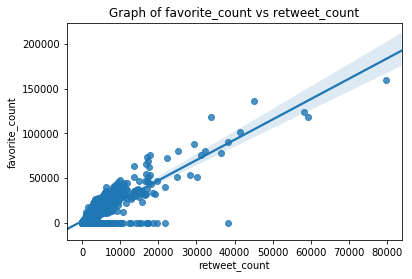

In [834]:
sns.regplot(data = master_twitter_df, x = 'retweet_count', y = 'favorite_count');
plt.title('Graph of favorite_count vs retweet_count');

From the above visualization, it is evident that there is an almost perfect positive correlation betweenf favorite tweet and retweet_count. From the graph, it shows that an increase or decrease in the retweet count brings about an equal increase or decrease in the favorite count of the dogs. 

ANALYSIS AND VISUALIZATON 4

Distribution of the dog stages i.e. the level maturity of the dogs under analysis 

In [843]:
 order = master_twitter_df['dog_stages'].value_counts()

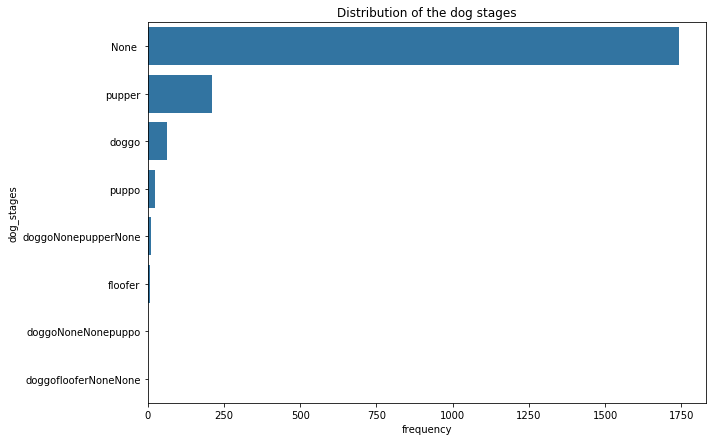

In [844]:
plt.figure(figsize = (10, 7))
color = sns.color_palette()[0]
order = order.index
sns.countplot(data =  master_twitter_df, y = 'dog_stages', color = color, order = order);
plt.xlabel('frequency')
plt.title('Distribution of the dog stages');

From the above analysis, it shows that there is was actually an issue with the neural network algorithm given the presence of 'None'. 

Furthermore, the graph shows that the dogs which were analyzed were more of:

pupper - a younger doggo, 2nd most mature

doggo - most matured dog

puppo - more of a baby dog, 3rd most mature

floofer - More of a generic name for any dog with excess fur

REFERENCES 

https://www.amazon.com/WeRateDogs-Most-Hilarious-Adorable-Youve/dp/1510717145
https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
https://stackoverflow.com/questions/23668427/pandas-joining-multiple-dataframes-on-columns?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa


In [853]:
master_twitter_df['dog_stages'].value_counts()

None                    1742
pupper                   211
doggo                     65
puppo                     23
doggoNonepupperNone       11
floofer                    7
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stages, dtype: int64